### Shape Block Detector


In [300]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def ip(img_print):
    if len(img_print.shape) == 2:
        plt.figure(figsize=(15,10))
        plt.imshow(img_print, cmap='gray')
    else:
        plt.figure(figsize=(15,10))
        plt.imshow(img_print[:,:,::-1])
    print(img_print.shape)
    
def hsvp(img_print):
    x =cv2.cvtColor(img_print, cv2.COLOR_2RGB)
    plt.figure(figsize=(15,10))
    plt.imshow(x)
    
    
cv2.__version__

'4.5.2'

(1500, 1500, 3)
(1500, 1500)


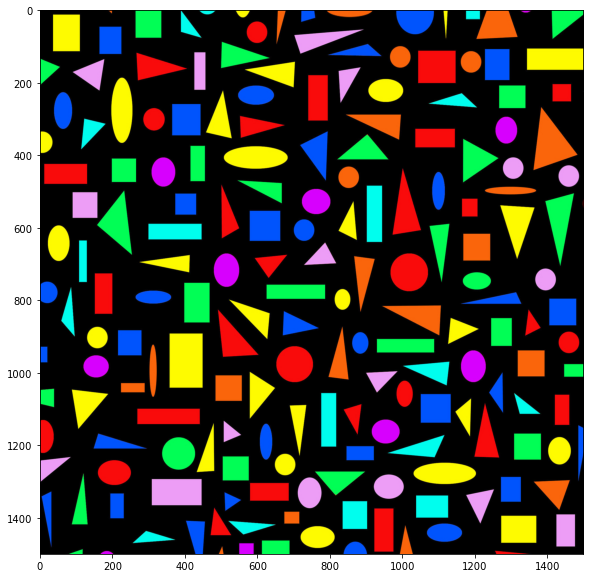

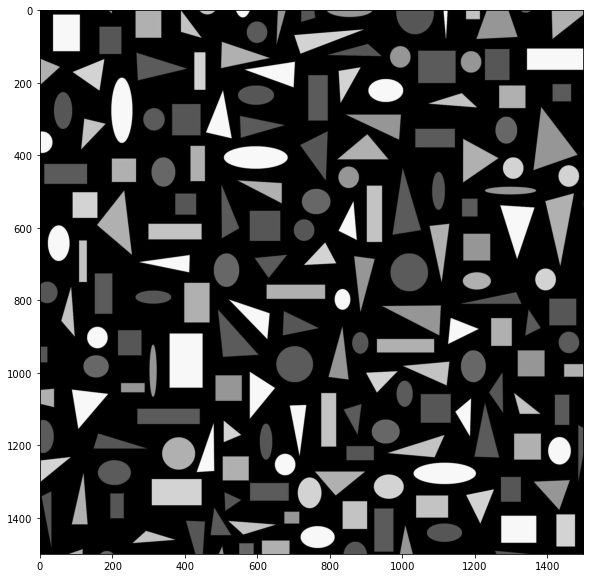

In [158]:
shape_blocks = cv2.imread('img/shapebg.jpg')
ip(shape_blocks)
shape_blocks_gray = cv2.cvtColor(shape_blocks, cv2.COLOR_)
ip(shape_blocks_gray)


(450, 450)
(1500, 1500)
(1500, 1500)


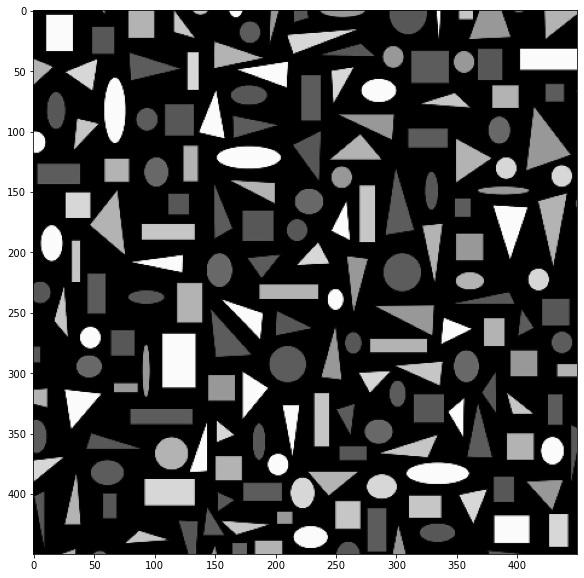

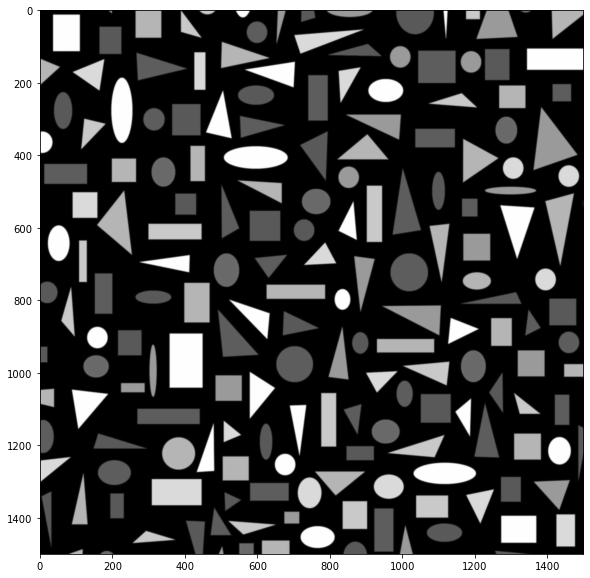

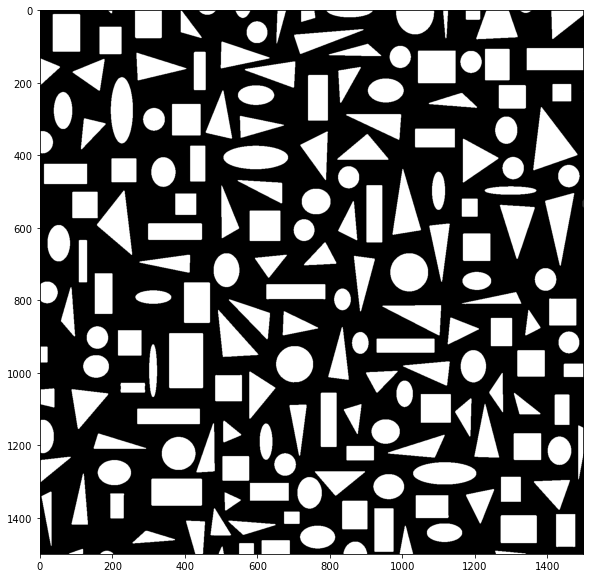

In [171]:
### DETECT USING THRESHOLDS
x_size =  int(shape_blocks_gray.shape[1] * 0.3)

y_size = int(shape_blocks_gray.shape[0] * 0.3)
resized = cv2.resize(shape_blocks_gray, (x_size, y_size)) 
ip(resized)
blurred = cv2.GaussianBlur(shape_blocks_gray, (5, 5), 0)
ip(blurred)
thresh = cv2.threshold(blurred, 30, 255, cv2.THRESH_BINARY)[1]
ip(thresh)


(1500, 1500)
(1500, 1500)


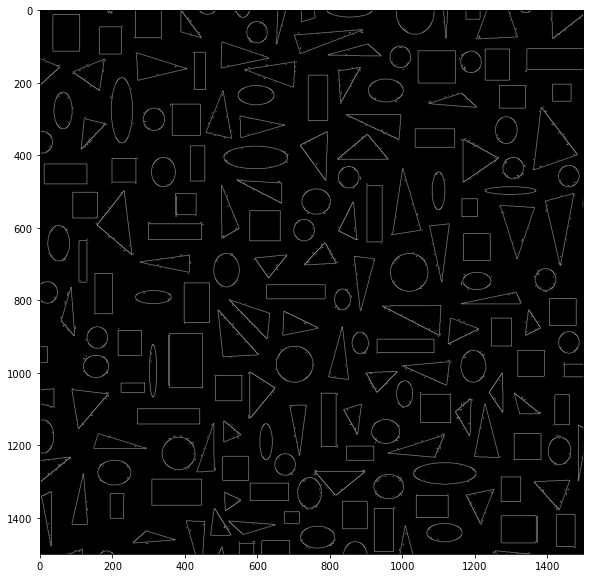

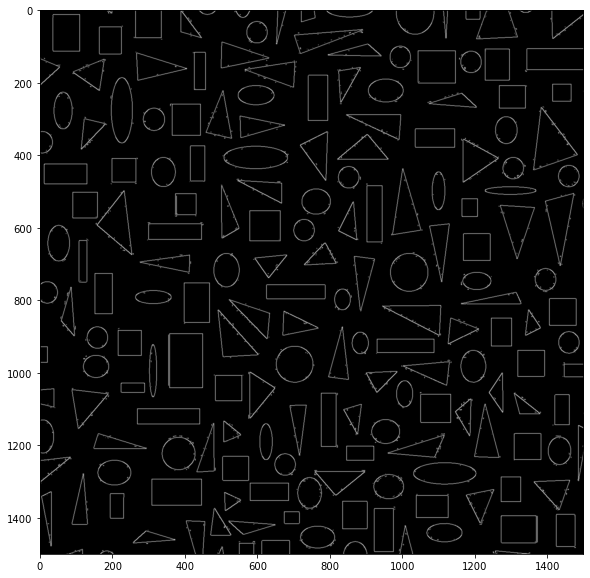

In [172]:
## DETECT USING CANNY
shape_blocks_canny = cv2.Canny(shape_blocks_gray,20,30)
ip(shape_blocks_canny)
kernel = np.ones((5, 5), np.uint8)
shape_blocks_canny_gb = cv2.GaussianBlur(shape_blocks_canny, (3,3),cv2.BORDER_CONSTANT)
ip(shape_blocks_canny_gb)
# shape_blocks_double_canny = cv2.Canny(shape_blocks_canny_gb.copy(),20,703)
# ip(shape_blocks_double_canny)
#Shape_blocks_dilation = cv2.dilate(shape_blocks_canny, kernel, iterations=1)
#ip(shape_blocks_dilation)


(1500, 1500, 3)


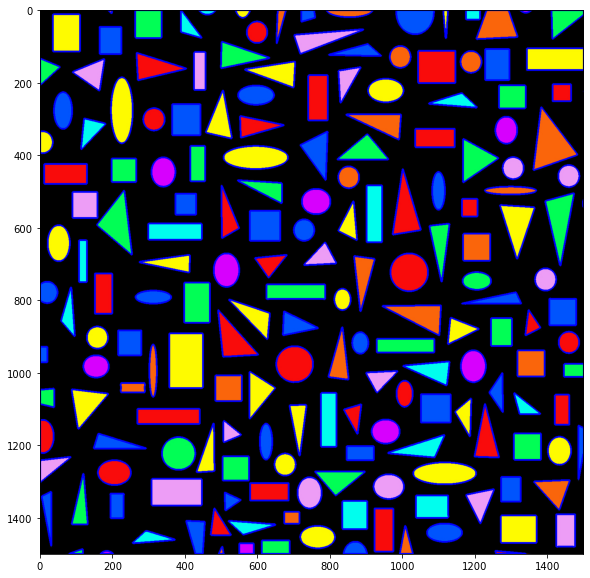

In [173]:
contour_img = thresh.copy()
contours, _ = cv2.findContours(contour_img, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
with_contours = shape_blocks.copy()
cv2.drawContours(with_contours, contours, -1, (255,0,0), 4)
ip(with_contours)

In [301]:
def find_shapes(binary_img, original_img):
    output = original_img.copy()
    contours, _ = cv2.findContours(binary_img.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
    for i,contour in enumerate(contours):
        approx = cv2.approxPolyDP(contour, 0.01* cv2.arcLength(contour, True), True)
        M = cv2.moments(contour)
        if M["m00"] != 0:
            cX = int(M["m10"] / M["m00"])
            cY = int(M["m01"] / M["m00"])
        else:
            cX, cY = 0, 0

        if len(approx) ==3: 
            x, y , w, h = cv2.boundingRect(approx)
            ratio = w/float(h)
            cv2.drawContours(output, contours, i, (255,0,0),10)
            cv2.putText(output, "T", (cX,cY), cv2.FONT_HERSHEY_PLAIN, 2, (255, 255, 255),3)
            
        elif len(approx)==4:
            if ratio >= 0.9 and ratio < 1.1:
                cv2.drawContours(output, contours, i, (0,0,255),10)
                cv2.putText(output, "S", (cX,cY), cv2.FONT_HERSHEY_PLAIN, 2, (255, 255, 255),3)
            else:
                cv2.drawContours(output, contours, i, (255,255,0),10)
                cv2.putText(output, "R", (cX,cY), cv2.FONT_HERSHEY_PLAIN, 2, (255, 255, 255),3)
                
        else:    
            cv2.drawContours(output, contours, i, (0,255,0),10)
        
    ip(output)
            
            


(1500, 1500, 3)


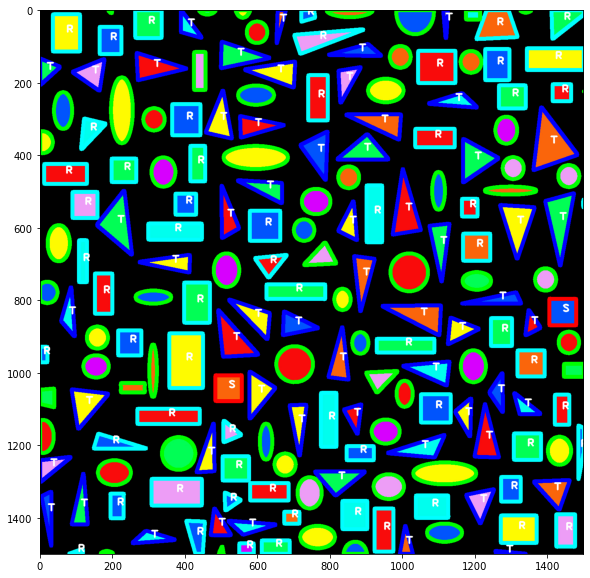

In [299]:
find_shapes(thresh, shape_blocks)